In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-interp-vander)


We create two vectors for data about the population of China. The first has the years of census data and the other has the population, in millions of people.

In [2]:
year = [1982, 2000, 2010, 2015]; 
pop = [1008.18, 1262.64, 1337.82, 1374.62];

:::{index} ! Julia; .-, ! Julia; .+
:::

:::{index} Julia; broadcasting
:::

It's convenient to measure time in years since 1980. We use `.-` to subtract a scalar from every element of a vector. We will also use a floating-point value in the subtraction, so the result is also in double precision.
```{tip}
:class: dropdown
A dotted operator such as `.-` or `.*` acts elementwise, broadcasting scalar values to match up with elements of an array.
```

In [3]:
t = year .- 1980.0
y = pop;

:::{index} ! Julia; comprehension
:::

Now we have four data points $(t_1,y_1),\dots,(t_4,y_4)$, so $n=4$ and we seek an interpolating cubic polynomial. We construct the associated Vandermonde matrix:
```{tip}
:class: dropdown
An expression inside square brackets and ending with a `for` statement is called a **comprehension**. It's often an easy and readable way to construct vectors and matrices. 
```

In [4]:
V = [ t[i]^j for i in 1:4, j in 0:3 ]

4×4 Matrix{Float64}:
 1.0   2.0     4.0      8.0
 1.0  20.0   400.0   8000.0
 1.0  30.0   900.0  27000.0
 1.0  35.0  1225.0  42875.0

:::{index} ! Julia; \\
:::

To solve for the vector of polynomial coefficients, we use a backslash to solve the linear system:
```{tip}
:class: dropdown
A **backslash** `\` is used to solve a linear system of equations.
```

In [5]:
c = V \ y

4-element Vector{Float64}:
 962.2387878787875
  24.127754689754774
  -0.5922620490620537
   0.00684386724386731

The algorithms used by the backslash operator are the main topic of this chapter. As a check on the solution, we can compute the *residual*.

In [6]:
y - V * c

4-element Vector{Float64}:
 0.0
 0.0
 2.2737367544323206e-13
 0.0

Using floating-point arithmetic, it is not realistic to expect exact equality of quantities; a relative difference comparable to $\macheps$ is all we can look for.

By our definitions, the elements of `c` are coefficients in ascending-degree order for the interpolating polynomial. We can use the polynomial to estimate the population of China in 2005:
```{tip}
:class: dropdown
The `Polynomials` package has functions to make working with polynomials easy and efficient.
```

In [7]:
using Polynomials
p = Polynomial(c)    # construct a polynomial
p(2005-1980)         # include the 1980 time shift

1302.2043001443

The official population value for 2005 was 1303.72, so our result is rather good. 

:::{index} ! Julia; scatter
:::

We can visualize the interpolation process. First, we plot the data as points.
```{tip}
:class: dropdown
The `scatter` function creates a scatter plot of points; you can specify a line connecting the points as well.
```
We want to superimpose a plot of the polynomial. We do that by evaluating it at a vector of points in the interval. The dot after the name of the polynomial is a universal way to apply a function to every element of an array, a technique known as **broadcasting**.
:::{card}
The `range` function constructs evenly spaced values given the endpoints and either the number of values, or the step size between them.

Adding a dot to the end of a function name causes it to be broadcast, i.e., applied to every element of a vector or matrix.
:::
::::

In [8]:
# Choose 500 times in the interval [0,35].
tt = range(0, 35, 500)

# Evaluate the polynomial at all the vector components.
yy = p.(tt)

foreach(println, yy[1:4])

962.2387878787875


963.9282039963299
965.6118068288089
967.2896105457506


:::{index} ! Julia; \!
:::

Now we use `plot!` to add to the current plot, rather than replacing it.
```{tip}
:class: dropdown
The `plot` function plots lines connecting the given $x$ and $y$ values; you can also specify markers at the points.
By convention, functions whose names end with the bang `!` change the value or state of something, in addition to possibly returning output.
```

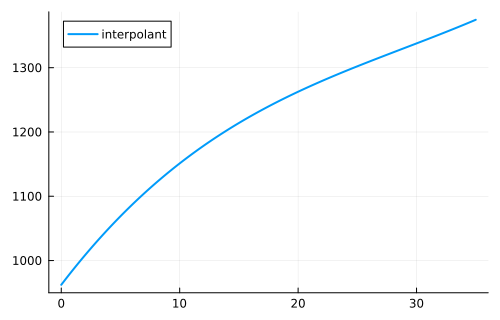

In [9]:
plot!(tt, yy, label="interpolant")